In [16]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_images(data_east, data_west):
    mean, sigma, min, max = np.mean(data_east), np.std(data_east), np.min(data_east), np.max(data_east)
    lperc, uperc = np.percentile(data_east, 5), np.percentile(data_east, 99.95)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,20))
    ax1.set_title("west")
    ax1_im = ax1.imshow(data_west, vmin=mean-sigma, vmax=uperc)
    fig.colorbar(ax1_im, cax=make_axes_locatable(ax1).append_axes('right', size='3%', pad=0.05), orientation='vertical')

    ax2.set_title("east")
    ax2_im = ax2.imshow(data_east, vmin=mean-sigma, vmax=uperc)
    fig.colorbar(ax2_im, cax=make_axes_locatable(ax2).append_axes('right', size='3%', pad=0.05), orientation='vertical')
    plt.show()

In [17]:
from lvmtipo.actors import lvm

await lvm.sci.agc.start()

east: /data/lvm/sci/agcam/east/20220624/lvm.sci.agcam.east_00000084.fits, west: /data/lvm/sci/agcam/west/20220624/lvm.sci.agcam.west_00000098.fits


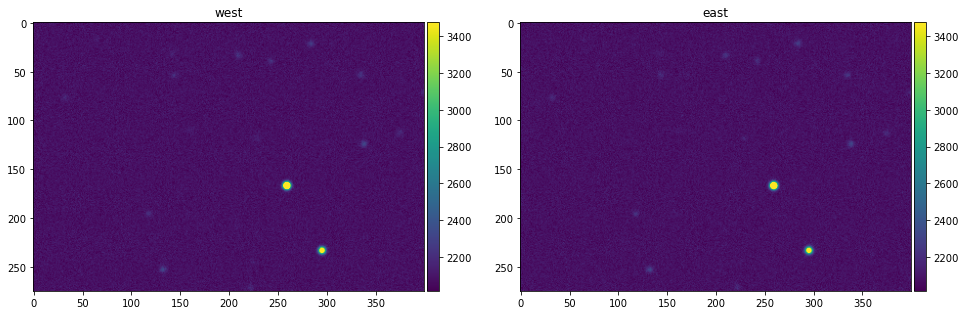

east: /data/lvm/sci/agcam/east/20220624/lvm.sci.agcam.east_00000085.fits, west: /data/lvm/sci/agcam/west/20220624/lvm.sci.agcam.west_00000099.fits


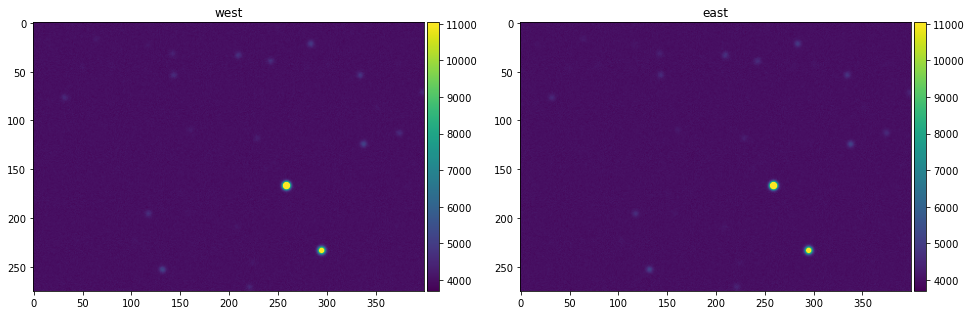

In [19]:
for e in [1.,5.]:
    ef, wf = (await lvm.sci.agc.expose(e)).flatten().unpack("east.filename", "west.filename") 
    print(f"east: {ef}, west: {wf}")
    plot_images(fits.getdata(ef, ext=0), fits.getdata(wf, ext=0))

In [7]:
await lvm.sci.foc.start()

east: /data/lvm/sci/agcam/east/20220624/lvm.sci.agcam.east_00000086.fits, west: /data/lvm/sci/agcam/west/20220624/lvm.sci.agcam.west_00000100.fits


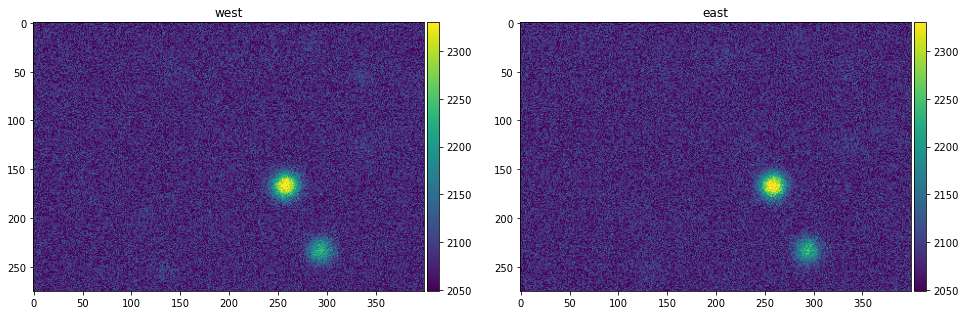

east: /data/lvm/sci/agcam/east/20220624/lvm.sci.agcam.east_00000087.fits, west: /data/lvm/sci/agcam/west/20220624/lvm.sci.agcam.west_00000101.fits


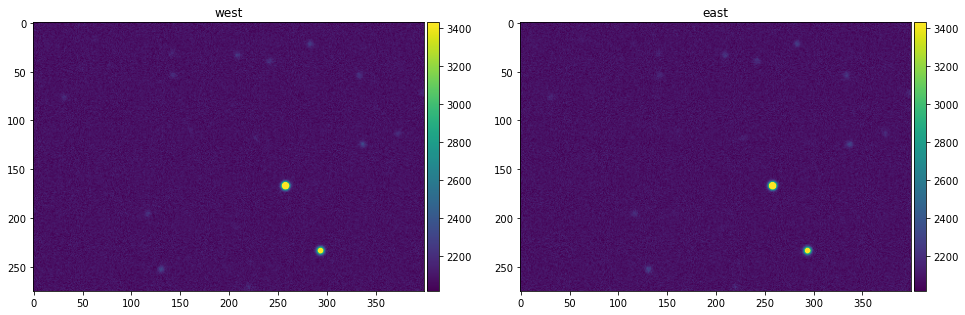

east: /data/lvm/sci/agcam/east/20220624/lvm.sci.agcam.east_00000088.fits, west: /data/lvm/sci/agcam/west/20220624/lvm.sci.agcam.west_00000102.fits


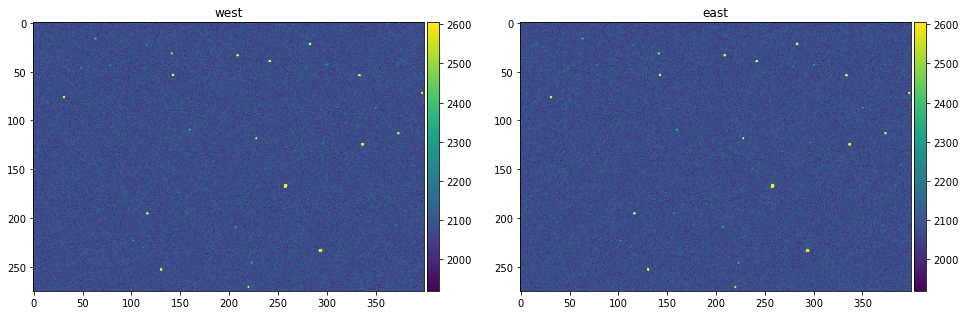

east: /data/lvm/sci/agcam/east/20220624/lvm.sci.agcam.east_00000089.fits, west: /data/lvm/sci/agcam/west/20220624/lvm.sci.agcam.west_00000103.fits


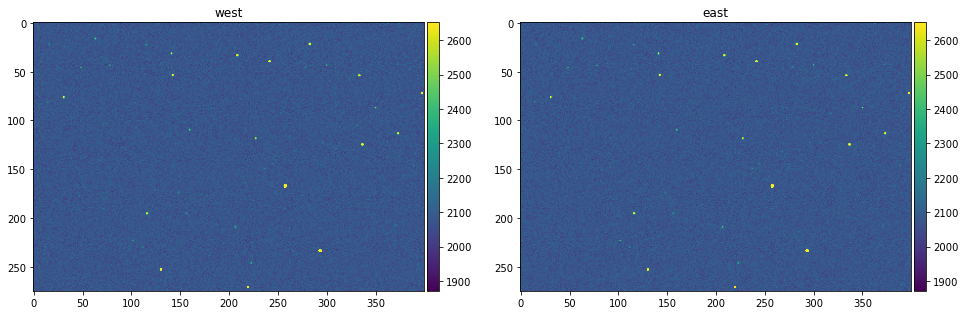

east: /data/lvm/sci/agcam/east/20220624/lvm.sci.agcam.east_00000090.fits, west: /data/lvm/sci/agcam/west/20220624/lvm.sci.agcam.west_00000104.fits


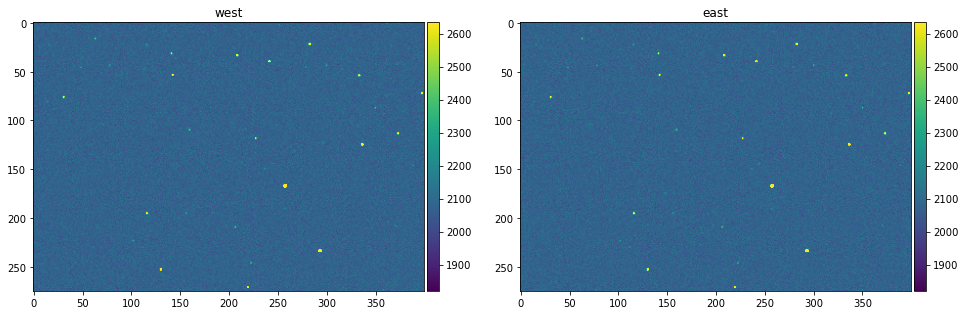

east: /data/lvm/sci/agcam/east/20220624/lvm.sci.agcam.east_00000091.fits, west: /data/lvm/sci/agcam/west/20220624/lvm.sci.agcam.west_00000105.fits


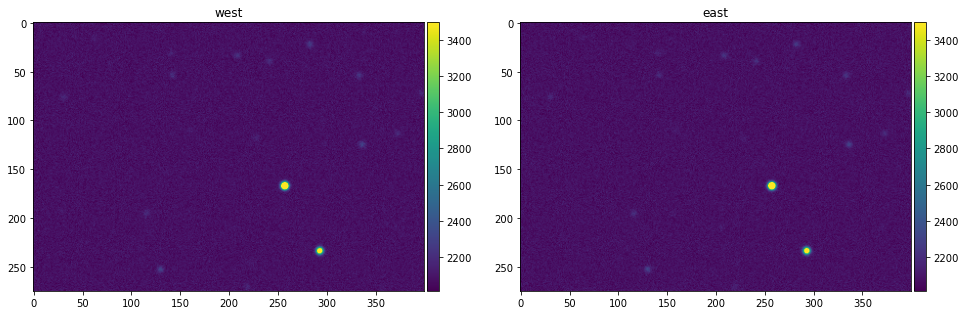

In [20]:
%matplotlib inline

for p in [600, 300, 100, 0, -100, -300]:
    await lvm.sci.foc.moveAbsolute(p)
    ef, wf = (await lvm.sci.agc.expose(1)).flatten().unpack("east.filename", "west.filename") 
    print(f"east: {ef}, west: {wf}")
    plot_images(fits.getdata(ef, ext=0), fits.getdata(wf, ext=0))

